In [9]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

data = pandas.read_csv("reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### Rating average by day

In [8]:
# create a new column of just date
data['Day'] = data['Timestamp'].dt.date
# group data by dates and aggregate by mean rating (only 'Rating' has float values which mean() can be applied to)
day_average = data.groupby(['Day']).mean()
# note that day_average is a dataframe with one column 'Rating' and index named 'Day'
day_average.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


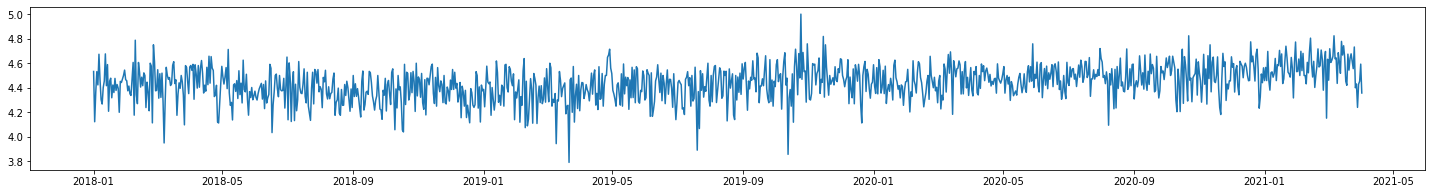

In [11]:
# plot(x, y)
plt.figure(figsize=(25,3))
plt.plot(day_average.index, day_average['Rating']) 

### Rating average by week

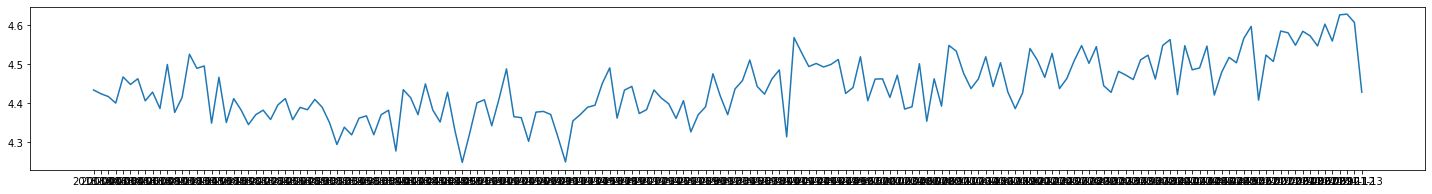

In [16]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week']).mean()
plt.figure(figsize=(25,3))
plt.plot(week_average.index, week_average['Rating'])

### Rating average by month

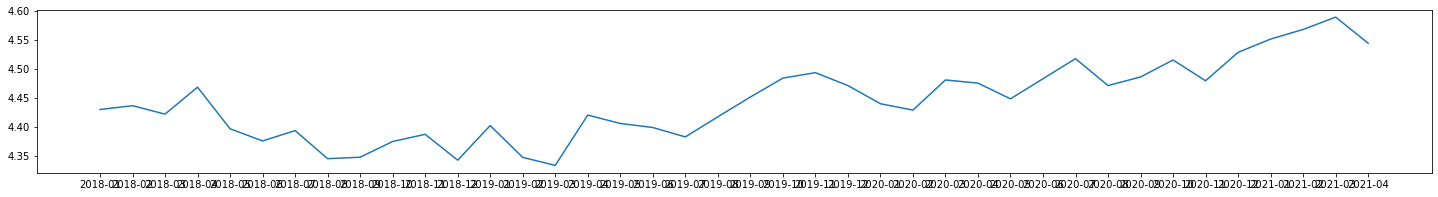

In [18]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).mean()
plt.figure(figsize=(25,3))
plt.plot(month_average.index, month_average['Rating'])

### Rating average by month by course

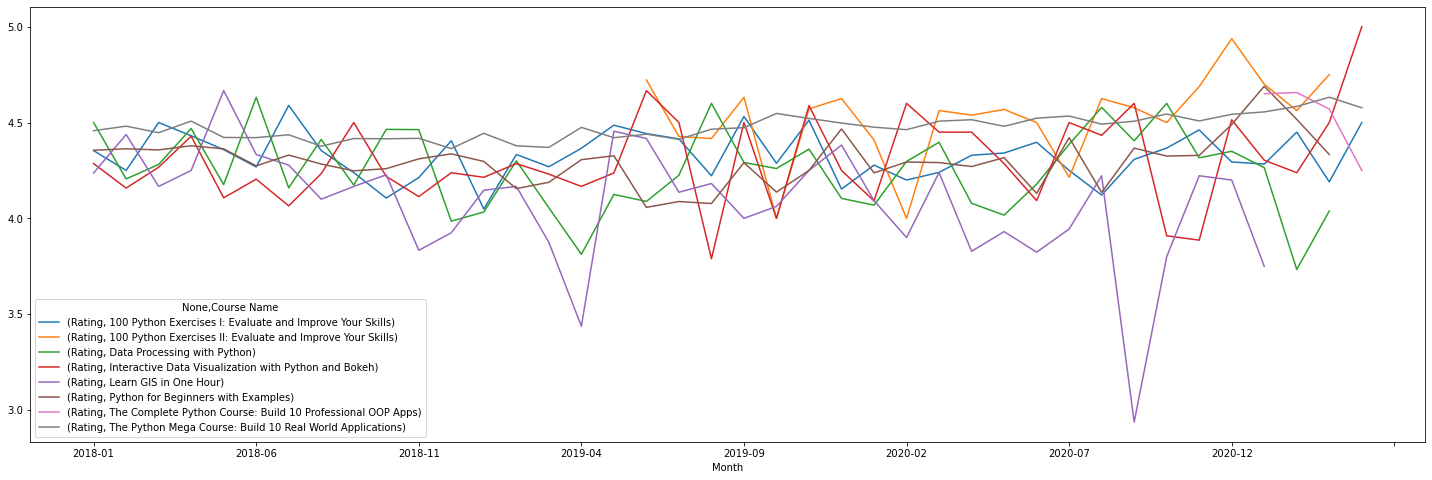

In [22]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_course_average = data.groupby(['Month', 'Course Name']).mean().unstack()
month_course_average.plot(figsize=(25, 8))

### What day of the week are people the happiest?

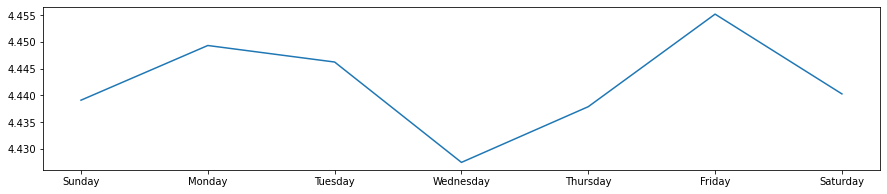

In [30]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')
plt.figure(figsize=[15, 3])
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])

### Number of ratings by course

([<matplotlib.patches.Wedge at 0xc13940>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609823, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015484, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

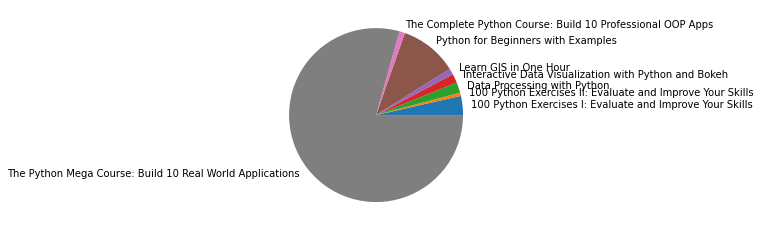

In [34]:
share = data.groupby(['Course Name'])['Rating'].count()
plt.pie(share, labels=share.index)